In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

url = 'https://raw.githubusercontent.com/krishnaik06/AQI-Project/master/Data/Real-Data/Real_Combine.csv'

df = pd.read_csv(url, error_bad_lines=False)


In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df=df.dropna()
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [5]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
# transform data
X= sc_x.fit_transform(X)


print(X)



[[-2.5758334  -3.4040112  -1.97306575 ... -2.01150096 -0.63876585
  -0.87715776]
 [-2.52049852 -2.96903049 -2.02687159 ... -1.87771128 -0.61272881
  -0.64450561]
 [-2.67266943 -2.86403514 -2.29590082 ... -1.87771128 -0.50858065
  -0.64450561]
 ...
 [-1.67664167 -1.19910894 -1.08526931 ... -1.87771128  0.50686392
  -0.13814505]
 [-1.34463241 -1.42409896 -1.30049269 ... -1.20876285  0.1683824
   0.0945071 ]
 [-1.34463241 -1.36410162 -1.40810438 ... -0.94118348  0.27253056
   0.34084467]]


# Splitting into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fitting the Regression model

In [7]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Model Evaluation

In [8]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

score.mean()

0.7276512525458696


Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
* Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5 .

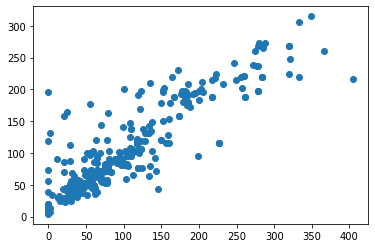

In [9]:

prediction=regressor.predict(X_test)

plt.scatter(y_test,prediction)


In [10]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, prediction))

MSE: 1528.9641809191544


In [11]:
import pickle
# open a file, where you ant to store the data
file = open('Random_forest_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)